Reference: https://mc-stan.org/users/documentation/case-studies/dorazio-royle-occupancy.html  
Dataset: https://esapubs.org/archive/ecol/E087/050/suppl-1.htm

In [1]:
import stan
import numpy as np
import matplotlib.pyplot as plt
import nest_asyncio; nest_asyncio.apply()
import pandas as pd; pd.set_option("mode.chained_assignment", None)
from utils import select_columns, plot_ESS, plot_GR, plot_posterior

df_bird = pd.read_csv("../data/breedingBirdData.csv")
df_butterfly = pd.read_csv("../data/butterflyData.csv")

display(df_bird)
display(df_butterfly)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50
Ardea.herodias,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Butorides.virescens,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Cathartes.aura,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
Coragyps.atratus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Buteo.lineatus,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Icterus.spurius,0,1,0,1,2,0,0,0,0,0,...,0,0,0,0,0,1,0,7,4,0
Carduelis.tristis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
Passer.domesticus,0,0,0,10,8,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Accipiter.striatus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
Aglais.urticae,0,0,1,0,1,2,1,0,1,1,2,0,3,2,1,1,1,0,2,0
Aphantopus.hyperantus,14,10,13,15,3,9,7,17,1,11,11,15,15,6,0,10,15,5,11,6
Argynnis.paphia,0,0,2,4,1,1,0,5,0,0,0,2,2,0,0,0,1,3,1,1
Aricia.artaxerxes,0,1,0,4,0,0,0,0,0,2,2,0,0,0,0,2,1,0,0,0
Aricia.eumedon,0,3,1,4,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
Brenthis.ino,0,1,1,1,0,0,1,1,0,0,3,0,0,0,0,0,0,1,0,0
Clossiana.selene,11,5,11,15,6,8,6,12,0,4,12,9,8,0,0,2,5,5,1,2
Coenonympha.arcania,12,14,9,11,6,11,10,14,2,9,11,13,13,5,2,13,15,10,7,4
Coenonympa.pamphilus,3,4,3,1,4,3,3,1,5,2,4,6,9,8,1,7,7,2,2,0
Polyommatus.semiargus,8,2,5,3,1,3,0,5,0,4,7,6,10,4,0,6,5,3,2,1


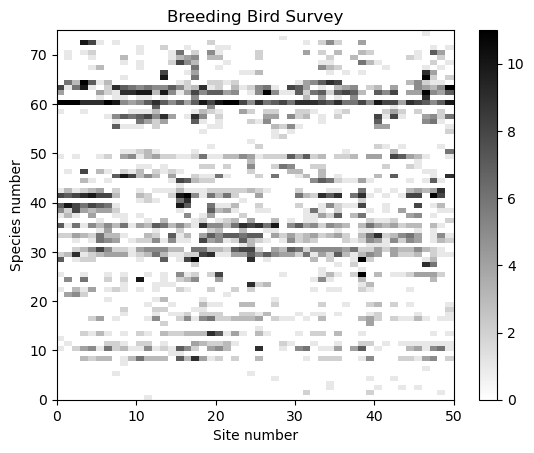

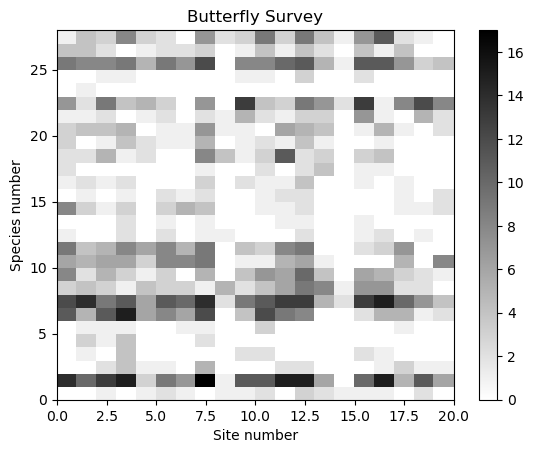

In [2]:
num_chains = 20
num_samples = 1000

J_bird = len(df_bird.columns)
K_bird = 11
x_bird = df_bird.to_numpy()
n_bird = len(df_bird.index)
S_bird = 150
data_bird = {"J": J_bird, "K": K_bird, "n": n_bird, "x": x_bird, "S": S_bird}

J_butterfly = len(df_butterfly.columns)
K_butterfly = 18
n_butterfly = len(df_butterfly.index)
x_butterfly = df_butterfly.to_numpy()
S_butterfly = 50
data_butterfly = {"J": J_butterfly, "K": K_butterfly, "n": n_butterfly, "x": x_butterfly, "S": S_butterfly}

plt.pcolor(x_bird, cmap="binary")
plt.colorbar()
plt.xlabel("Site number")
plt.ylabel("Species number")
plt.title("Breeding Bird Survey")
plt.show()

plt.pcolor(x_butterfly, cmap="binary")
plt.colorbar()
plt.xlabel("Site number")
plt.ylabel("Species number")
plt.title("Butterfly Survey")
plt.show()

In [3]:
species_occupancy_centered = """
functions {
  matrix cov_matrix_2d(vector sigma, real rho) {
    matrix[2,2] Sigma;
    Sigma[1,1] = square(sigma[1]);
    Sigma[2,2] = square(sigma[2]);
    Sigma[1,2] = sigma[1] * sigma[2] * rho;
    Sigma[2,1] = Sigma[1,2];
    return Sigma;
  }

  real lp_observed(int x, int K, real logit_psi, real logit_theta) {
    return log_inv_logit(logit_psi)
      + binomial_logit_lpmf(x | K, logit_theta);
  }

  real lp_unobserved(int K, real logit_psi, real logit_theta) {
    return log_sum_exp(lp_observed(0, K, logit_psi, logit_theta),
                       log1m_inv_logit(logit_psi));
  }

  real lp_never_observed(int J, int K, real logit_psi, real logit_theta,
                         real Omega) {
      real lp_unavailable = bernoulli_lpmf(0 | Omega);
      real lp_available = bernoulli_lpmf(1 | Omega)
        + J * lp_unobserved(K, logit_psi, logit_theta);
      return log_sum_exp(lp_unavailable, lp_available);
    }
}
data {
  int<lower=1> J;  // sites within region
  int<lower=1> K;  // visits to sites
  int<lower=1> n;  // observed species
  array[n,J] int<lower=0, upper=K> x;  // visits when species i was detected at site j
  int<lower=n> S;  // superpopulation size
}
parameters {
  real alpha;  //  site-level occupancy
  real beta;   //  site-level detection
  real<lower=0,upper=1> Omega;   // availability of species
  real<lower=-1,upper=1> rho_uv; // correlation of (occupancy, detection)
  vector<lower=0>[2] sigma_uv;   // sd of (occupancy, detection)
  matrix[S,2] uv;                // species-level (occupancy, detection)
}
transformed parameters {
  vector[S] logit_psi = uv[:,1];    // log odds  of occurrence
  vector[S] logit_theta = uv[:,2];  // log odds of detection
  cov_matrix[2] Sigma = cov_matrix_2d(sigma_uv, rho_uv);
}
model {
  // priors
  alpha ~ cauchy(0, 2.5);
  beta ~ cauchy(0, 2.5);
  sigma_uv ~ lognormal(0, 1);
  rho_uv ~ uniform(-1, 1);
  for (i in 1:S)
      uv[i] ~ multi_normal([alpha, beta], Sigma);
  Omega ~ uniform(0, 1);

  // likelihood
  target += n * log(Omega);
  for (i in 1:n) {
    for (j in 1:J) {
      if (x[i,j] > 0)
        target += lp_observed(x[i,j], K, logit_psi[i], logit_theta[i]);
      else
        target += lp_unobserved(K, logit_psi[i], logit_theta[i]);
    }
  }
  for (i in (n + 1):S)
    target += lp_never_observed(J, K, logit_psi[i], logit_theta[i], Omega);
}
generated quantities {
  real<lower=0,upper=S> E_N = S * Omega; // model-based expectation species
  int<lower=0,upper=S> E_N_2;  // posterior simulated species
  
  E_N_2 = n;
  for (i in (n+1):S) {
    real lp_unavailable = bernoulli_lpmf(0 | Omega);
    real lp_available = bernoulli_lpmf(1 | Omega)
      + J * lp_unobserved(K, logit_psi[i], logit_theta[i]);
    real Pr_available = exp(lp_available
                            - log_sum_exp(lp_unavailable, lp_available));
    E_N_2 += bernoulli_rng(Pr_available);
  }
}
"""

In [4]:
posterior_bird_centered = stan.build(species_occupancy_centered, data=data_bird)
fit_bird_centered = posterior_bird_centered.sample(num_chains=num_chains, num_samples=num_samples)
df_bird_centered = fit_bird_centered.to_frame()
df_bird_centered.to_csv("result/species_occupancy_bird_centered.csv")

Building: found in cache, done.
Messages from stanc:
Sampling:   0%
Sampling:   0% (1/40000)
Sampling:   0% (2/40000)
Sampling:   0% (3/40000)
Sampling:   0% (4/40000)
Sampling:   0% (5/40000)
Sampling:   0% (6/40000)
Sampling:   0% (7/40000)
Sampling:   0% (8/40000)
Sampling:   0% (9/40000)
Sampling:   0% (10/40000)
Sampling:   0% (11/40000)
Sampling:   0% (12/40000)
Sampling:   0% (13/40000)
Sampling:   0% (14/40000)
Sampling:   0% (15/40000)
Sampling:   0% (16/40000)
Sampling:   0% (17/40000)
Sampling:   0% (18/40000)
Sampling:   0% (19/40000)
Sampling:   0% (20/40000)
Sampling:   0% (119/40000)
Sampling:   1% (218/40000)
Sampling:   1% (317/40000)
Sampling:   1% (416/40000)
Sampling:   1% (515/40000)
Sampling:   2% (714/40000)
Sampling:   2% (913/40000)
Sampling:   3% (1112/40000)
Sampling:   3% (1311/40000)
Sampling:   4% (1410/40000)
Sampling:   4% (1610/40000)
Sampling:   5% (1909/40000)
Sampling:   5% (2008/40000)
Sampling:   5% (2107/40000)
Sampling:   6% (2407/40000)
Sampling

  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: model_ffl66sps_namespace::log_prob: Sigma is not symmetric. Sigma[1,2] = -inf, but Sigma[2,1] = -inf (in '/tmp/httpstan_tcylxcol/model_ffl66sps.stan', line 48, column 2 to column 56)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: model_ffl66sps_namespace::log_prob: Sigma is not symmetric. Sigma[1,2] = -inf, but Sigma[2,1] = -inf (in '/tmp/httpstan_tcylxcol/model_ffl66sps.stan', line 48, column 2 to column 56)
  If this warning occurs sporadically, such as for highly constrained variable types like covarian

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 0.002098 seconds
  1000 transitions using 10 leapfrog steps per transition would take 20.98 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: model_ffl66sps_namespace::log_prob: Sigma is not symmetric. Sigma[1,2] = -nan, but Sigma[2,1] = -nan (in '/tmp/httpstan_tcylxcol/model_ffl66sps.stan', line 48, column 2 to column 56)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The curren

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 0.001917 seconds
  1000 transitions using 10 leapfrog steps per transition would take 19.17 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: model_ffl66sps_namespace::log_prob: Sigma is not symmetric. Sigma[1,2] = inf, but Sigma[2,1] = inf (in '/tmp/httpstan_tcylxcol/model_ffl66sps.stan', line 48, column 2 to column 56)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: model_ffl66sps_namespace::log_prob: Sigma is not

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 0.004684 seconds
  1000 transitions using 10 leapfrog steps per transition would take 46.84 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: model_ffl66sps_namespace::log_prob: Sigma is not positive definite. (in '/tmp/httpstan_tcylxcol/model_ffl66sps.stan', line 48, column 2 to column 56)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: model_ffl66sps_namespace::log_prob: Sigma is not positive definite. (in '/tmp/httpstan_tcylxcol/model_ffl66sps.stan', line 48, column 2 to column 56)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 0.002573 seconds
  1000 transitions using 10 leapfrog steps per transition would take 25.73 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to

In [5]:
posterior_butterfly_centered = stan.build(species_occupancy_centered, data=data_butterfly)
fit_butterfly_centered = posterior_butterfly_centered.sample(num_chains=num_chains, num_samples=num_samples)
df_butterfly_centered = fit_butterfly_centered.to_frame()
df_butterfly_centered.to_csv("result/species_occupancy_butterfly_centered.csv")

Building: found in cache, done.
Messages from stanc:
Sampling:   0%
Sampling:   1% (400/40000)
Sampling:   2% (900/40000)
Sampling:   4% (1500/40000)
Sampling:   5% (2100/40000)
Sampling:   6% (2600/40000)
Sampling:   8% (3100/40000)
Sampling:  10% (3900/40000)
Sampling:  11% (4500/40000)
Sampling:  14% (5501/40000)
Sampling:  16% (6502/40000)
Sampling:  19% (7602/40000)
Sampling:  24% (9602/40000)
Sampling:  29% (11602/40000)
Sampling:  34% (13602/40000)
Sampling:  38% (15102/40000)
Sampling:  42% (16602/40000)
Sampling:  47% (18602/40000)
Sampling:  50% (20102/40000)
Sampling:  55% (22102/40000)
Sampling:  60% (24102/40000)
Sampling:  64% (25402/40000)
Sampling:  67% (26902/40000)
Sampling:  71% (28302/40000)
Sampling:  74% (29702/40000)
Sampling:  78% (31002/40000)
Sampling:  81% (32502/40000)
Sampling:  84% (33702/40000)
Sampling:  88% (35102/40000)
Sampling:  90% (36101/40000)
Sampling:  93% (37100/40000)
Sampling:  95% (38000/40000)
Sampling:  96% (38500/40000)
Sampling:  98% (39

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: model_ffl66sps_namespace::log_prob: Sigma is not symmetric. Sigma[1,2] = -nan, but Sigma[2,1] = -nan (in '/tmp/httpstan_tcylxcol/model_ffl66sps.stan', line 48, column 2 to column 56)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: model_ffl66sps_namespace::log_prob: Sigma is not symmetric. Sigma[1,2] = -inf

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 0.000826 seconds
  1000 transitions using 10 leapfrog steps per transition would take 8.26 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: model_ffl66sps_namespace::log_prob: Sigma is not symmetric. Sigma[1,2] = inf, but Sigma[2,1] = inf (in '/tmp/httpstan_tcylxcol/model_ffl66sps.stan', line 48, column 2 to column 56)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current M

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: model_ffl66sps_namespace::log_prob: Sigma is not symmetric. Sigma[1,2] = inf, but Sigma[2,1] = inf (in '/tmp/httpstan_tcylxcol/model_ffl66sps.stan', line 48, column 2 to column 56)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: model_ffl66sps_namespace::log_prob: Sigma is not symmetric. Sigma[1,2] = inf, but Sigma[2,1] = inf (in '/tmp/httpstan_tcylxcol/model_ffl66sps.stan', line 48, column 2 to column 56)
  If this warning occurs sporadical

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: model_ffl66sps_namespace::log_prob: Sigma is not positive definite. (in '/tmp/httpstan_tcylxcol/model_ffl66sps.stan', line 48, column 2 to column 56)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 0.000312 seconds
  1000 transitions using 10 leapfrog steps per transition would take 3.12 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: model_ffl66sps_namespace::log_prob: Sigma is not symmetric. Sigma[1,2] = -nan, b

In [6]:
species_occupancy_noncentered = """
functions {
  matrix cov_matrix_2d(vector sigma, real rho) {
    matrix[2,2] Sigma;
    Sigma[1,1] = square(sigma[1]);
    Sigma[2,2] = square(sigma[2]);
    Sigma[1,2] = sigma[1] * sigma[2] * rho;
    Sigma[2,1] = Sigma[1,2];
    return Sigma;
  }

  real lp_observed(int x, int K, real logit_psi, real logit_theta) {
    return log_inv_logit(logit_psi)
      + binomial_logit_lpmf(x | K, logit_theta);
  }

  real lp_unobserved(int K, real logit_psi, real logit_theta) {
    return log_sum_exp(lp_observed(0, K, logit_psi, logit_theta),
                       log1m_inv_logit(logit_psi));
  }

  real lp_never_observed(int J, int K, real logit_psi, real logit_theta,
                         real Omega) {
      real lp_unavailable = bernoulli_lpmf(0 | Omega);
      real lp_available = bernoulli_lpmf(1 | Omega)
        + J * lp_unobserved(K, logit_psi, logit_theta);
      return log_sum_exp(lp_unavailable, lp_available);
    }
}
data {
  int<lower=1> J;  // sites within region
  int<lower=1> K;  // visits to sites
  int<lower=1> n;  // observed species
  array[n,J] int<lower=0, upper=K> x;  // visits when species i was detected at site j
  int<lower=n> S;  // superpopulation size
}
parameters {
  real alpha_hat;  //  reparameterised alpha
  real beta_hat;   //  reparameterised beta
  real<lower=0,upper=1> Omega;       // availability of species
  real<lower=-1,upper=1> rho_uv;     // correlation of (occupancy, detection)
  vector[2] sigma_uv_hat;            // reparameterised sigma_uv
  matrix[S,2] uv_hat;                // reparameterised uv
}
transformed parameters {
  real alpha = alpha_hat * 2.5;
  real beta = beta_hat * 2.5;
  vector<lower=0>[2] sigma_uv = exp(sigma_uv_hat);
  cov_matrix[2] Sigma = cov_matrix_2d(sigma_uv, rho_uv);
  matrix[S,2] uv = uv_hat * cholesky_decompose(Sigma);
  vector[S] logit_psi = uv[:,1] + alpha;
  vector[S] logit_theta = uv[:,2] + beta;
}
model {
  // priors
  alpha_hat ~ cauchy(0, 1);
  beta_hat ~ cauchy(0, 1);
  sigma_uv_hat ~ normal(0, 1);
  rho_uv ~ uniform(-1, 1);
  to_vector(uv_hat) ~ std_normal();
  Omega ~ uniform(0, 1);

  // likelihood
  target += n * log(Omega);
  for (i in 1:n) {
    for (j in 1:J) {
      if (x[i,j] > 0)
        target += lp_observed(x[i,j], K, logit_psi[i], logit_theta[i]);
      else
        target += lp_unobserved(K, logit_psi[i], logit_theta[i]);
    }
  }
  for (i in (n + 1):S)
    target += lp_never_observed(J, K, logit_psi[i], logit_theta[i], Omega);
}
generated quantities {
  real<lower=0,upper=S> E_N = S * Omega; // model-based expectation species
  int<lower=0,upper=S> E_N_2;  // posterior simulated species

  E_N_2 = n;
  for (i in (n+1):S) {
    real lp_unavailable = bernoulli_lpmf(0 | Omega);
    real lp_available = bernoulli_lpmf(1 | Omega)
      + J * lp_unobserved(K, logit_psi[i], logit_theta[i]);
    real Pr_available = exp(lp_available
                            - log_sum_exp(lp_unavailable, lp_available));
    E_N_2 += bernoulli_rng(Pr_available);
  }
}
"""

In [7]:
posterior_bird_noncentered = stan.build(species_occupancy_noncentered, data=data_bird)
fit_bird_noncentered = posterior_bird_noncentered.sample(num_chains=num_chains, num_samples=num_samples)
df_bird_noncentered = fit_bird_noncentered.to_frame()
df_bird_noncentered.to_csv("result/species_occupancy_bird_noncentered.csv")

Building: 0.3s
Building: 0.4s
Building: 0.5s
Building: 0.6s
Building: 0.7s
Building: 0.8s
Building: 0.9s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.4s
Building: 1.5s
Building: 1.6s
Building: 1.7s
Building: 1.8s
Building: 1.9s
Building: 2.0s
Building: 2.1s
Building: 2.2s
Building: 2.3s
Building: 2.4s
Building: 2.5s
Building: 2.6s
Building: 2.7s
Building: 2.8s
Building: 2.9s
Building: 3.0s
Building: 3.1s
Building: 3.2s
Building: 3.3s
Building: 3.4s
Building: 3.5s
Building: 3.6s
Building: 3.7s
Building: 3.8s
Building: 3.9s
Building: 4.0s
Building: 4.2s
Building: 4.3s
Building: 4.4s
Building: 4.5s
Building: 4.6s
Building: 4.7s
Building: 4.8s
Building: 4.9s
Building: 5.0s
Building: 5.1s
Building: 5.2s
Building: 5.3s
Building: 5.4s
Building: 5.5s
Building: 5.6s
Building: 5.7s
Building: 5.8s
Building: 5.9s
Building: 6.0s
Building: 6.1s
Building: 6.2s
Building: 6.3s
Building: 6.4s
Building: 6.5s
Building: 6.6s
Building: 6.7s
Building: 6.9s
Building: 7.0s
Building: 7.1s
Building: 

In file included from /home/sangho/anaconda3/envs/ppl/lib/python3.9/site-packages/httpstan/include/stan/model/indexing.hpp:5,
                 from /home/sangho/anaconda3/envs/ppl/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:17,
                 from /home/sangho/.cache/httpstan/4.8.2/models/jljrphvp/model_jljrphvp.cpp:2:
/home/sangho/anaconda3/envs/ppl/lib/python3.9/site-packages/httpstan/include/stan/model/indexing/assign_varmat.hpp: In function ‘void stan::model::assign(Mat1&&, const Mat2&, const char*, const stan::model::index_multi&, const stan::model::index_multi&)’:
/home/sangho/anaconda3/envs/ppl/lib/python3.9/site-packages/httpstan/include/stan/model/indexing/assign_varmat.hpp:401:9: warning: typedef ‘using pair_type = struct std::pair<int, std::vector<int, stan::math::arena_allocator<int> > >’ locally defined but not used [-Wunused-local-typedefs]
  401 |   using pair_type = std::pair<int, arena_vec>;
      |         ^~~~~~~~~


Building: 8.1s
Building: 8.2s
Building: 8.3s
Building: 8.4s


/home/sangho/.cache/httpstan/4.8.2/models/jljrphvp/model_jljrphvp.cpp: In instantiation of ‘void model_jljrphvp_namespace::model_jljrphvp::transform_inits_impl(VecVar&, VecI&, VecVar&, std::ostream*) const [with VecVar = std::vector<double, std::allocator<double> >; VecI = std::vector<int>; stan::require_vector_t<T_y>* <anonymous> = 0; stan::require_vector_like_vt<std::is_integral, VecI>* <anonymous> = 0; std::ostream = std::basic_ostream<char>]’:
/home/sangho/.cache/httpstan/4.8.2/models/jljrphvp/model_jljrphvp.cpp:1029:69:   required from here
/home/sangho/.cache/httpstan/4.8.2/models/jljrphvp/model_jljrphvp.cpp:730:11: warning: variable ‘pos__’ set but not used [-Wunused-but-set-variable]
  730 |       int pos__ = std::numeric_limits<int>::min();
      |           ^~~~~


Building: 8.5s
Building: 8.6s
Building: 8.7s
Building: 8.8s
Building: 8.9s
Building: 9.0s
Building: 9.1s
Building: 9.2s
Building: 9.3s
Building: 9.4s
Building: 9.5s
Building: 9.7s
Building: 9.8s
Building: 9.9s
Building: 10.0s
Building: 10.1s
Building: 10.2s
Building: 10.3s
Building: 10.4s
Building: 10.5s
Building: 10.6s
Building: 10.7s
Building: 10.8s
Building: 10.9s
Building: 11.0s
Building: 11.1s
Building: 11.2s
Building: 11.3s
Building: 11.4s
Building: 11.5s
Building: 11.6s
Building: 11.7s
Building: 11.8s
Building: 11.9s
Building: 12.0s
Building: 12.1s
Building: 12.2s
Building: 12.3s
Building: 12.5s
Building: 12.6s
Building: 12.7s
Building: 12.8s
Building: 12.9s
Building: 13.0s
Building: 13.1s
Building: 13.2s
Building: 13.3s
Building: 13.4s
Building: 13.5s
Building: 13.6s
Building: 13.7s
Building: 13.8s
Building: 13.9s
Building: 14.0s
Building: 14.1s
Building: 14.2s
Building: 14.3s
Building: 14.4s
Building: 14.5s
Building: 14.6s
Building: 14.7s
Building: 14.8s
Building: 14.9s
Buildi

Building: 23.5s, done.
Messages from stanc:
Sampling:   0%
Sampling:   0% (1/40000)
Sampling:   0% (2/40000)
Sampling:   0% (3/40000)
Sampling:   0% (4/40000)
Sampling:   0% (5/40000)
Sampling:   0% (6/40000)
Sampling:   0% (7/40000)
Sampling:   0% (8/40000)
Sampling:   0% (9/40000)
Sampling:   0% (10/40000)
Sampling:   0% (11/40000)
Sampling:   0% (12/40000)
Sampling:   0% (13/40000)
Sampling:   0% (14/40000)
Sampling:   0% (15/40000)
Sampling:   0% (16/40000)
Sampling:   0% (17/40000)
Sampling:   0% (18/40000)
Sampling:   0% (19/40000)
Sampling:   0% (20/40000)
Sampling:   0% (119/40000)
Sampling:   1% (218/40000)
Sampling:   1% (317/40000)
Sampling:   1% (416/40000)
Sampling:   1% (515/40000)
Sampling:   2% (614/40000)
Sampling:   2% (713/40000)
Sampling:   2% (812/40000)
Sampling:   2% (911/40000)
Sampling:   3% (1011/40000)
Sampling:   3% (1111/40000)
Sampling:   3% (1210/40000)
Sampling:   3% (1310/40000)
Sampling:   4% (1409/40000)
Sampling:   4% (1508/40000)
Sampling:   4% (160

Sampling:  51% (20203/40000)
Sampling:  51% (20403/40000)
Sampling:  52% (20603/40000)
Sampling:  52% (20804/40000)
Sampling:  52% (20904/40000)
Sampling:  53% (21205/40000)
Sampling:  54% (21405/40000)
Sampling:  54% (21505/40000)
Sampling:  55% (21805/40000)
Sampling:  55% (22004/40000)
Sampling:  55% (22105/40000)
Sampling:  56% (22405/40000)
Sampling:  57% (22706/40000)
Sampling:  57% (22905/40000)
Sampling:  58% (23005/40000)
Sampling:  58% (23105/40000)
Sampling:  59% (23405/40000)
Sampling:  59% (23505/40000)
Sampling:  60% (23804/40000)
Sampling:  60% (23904/40000)
Sampling:  60% (24104/40000)
Sampling:  61% (24404/40000)
Sampling:  61% (24504/40000)
Sampling:  62% (24603/40000)
Sampling:  62% (24803/40000)
Sampling:  63% (25102/40000)
Sampling:  64% (25402/40000)
Sampling:  64% (25602/40000)
Sampling:  65% (25902/40000)
Sampling:  66% (26202/40000)
Sampling:  66% (26401/40000)
Sampling:  67% (26701/40000)
Sampling:  68% (27000/40000)
Sampling:  68% (27100/40000)
Sampling:  68%

  Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/httpstan_5yj20w9i/model_jljrphvp.stan', line 50, column 2 to column 54)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 0.003226 seconds
  1000 transitions using 10 leapfrog steps per transition would take 32.26 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/httpstan_5yj20w9i/model_jljrphvp.stan', line 50, column 2 to column 54)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then 

  Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/httpstan_5yj20w9i/model_jljrphvp.stan', line 50, column 2 to column 54)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/httpstan_5yj20w9i/model_jljrphvp.stan', line 50, column 2 to column 54)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the follo

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 0.001976 seconds
  1000 transitions using 10 leapfrog steps per transition would take 19.76 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/httpstan_5yj20w9i/model_jljrphvp.stan', line 50, column 2 to column 54)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected b

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 0.002532 seconds
  1000 transitions using 10 leapfrog steps per transition would take 25.32 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/httpstan_5yj20w9i/model_jljrphvp.stan', line 50, column 2 to column 54)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/httpstan_5yj20w9i/model_jljrp

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/httpstan_5yj20w9i/model_jljrphvp.stan', line 50, column 2 to column 54)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/httpstan_5yj20w9i/model_jljrphvp.stan', line 50, column 2 to

  Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/httpstan_5yj20w9i/model_jljrphvp.stan', line 50, column 2 to column 54)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: cholesky_decompose: A is not symmetric. A[1,2] = -nan, but A[2,1] = -nan (in '/tmp/httpstan_5yj20w9i/model_jljrphvp.stan', line 50, column 2 to column 54)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected b

In [8]:
posterior_butterfly_noncentered = stan.build(species_occupancy_noncentered, data=data_butterfly)
fit_butterfly_noncentered = posterior_butterfly_noncentered.sample(num_chains=num_chains, num_samples=num_samples)
df_butterfly_noncentered = fit_butterfly_noncentered.to_frame()
df_butterfly_noncentered.to_csv("result/species_occupancy_butterfly_noncentered.csv")

Building: found in cache, done.
Messages from stanc:
Sampling:   0%
Sampling:   0% (100/40000)
Sampling:   1% (300/40000)
Sampling:   1% (500/40000)
Sampling:   2% (700/40000)
Sampling:   2% (1000/40000)
Sampling:   3% (1200/40000)
Sampling:   4% (1700/40000)
Sampling:   5% (1900/40000)
Sampling:   5% (2100/40000)
Sampling:   7% (2800/40000)
Sampling:   8% (3000/40000)
Sampling:  12% (4600/40000)
Sampling:  14% (5700/40000)
Sampling:  19% (7700/40000)
Sampling:  22% (8900/40000)
Sampling:  27% (10900/40000)
Sampling:  30% (12100/40000)
Sampling:  33% (13300/40000)
Sampling:  36% (14600/40000)
Sampling:  42% (16600/40000)
Sampling:  45% (18100/40000)
Sampling:  50% (19900/40000)
Sampling:  54% (21700/40000)
Sampling:  59% (23500/40000)
Sampling:  63% (25200/40000)
Sampling:  68% (27000/40000)
Sampling:  71% (28500/40000)
Sampling:  76% (30300/40000)
Sampling:  80% (32100/40000)
Sampling:  84% (33400/40000)
Sampling:  88% (35200/40000)
Sampling:  89% (35600/40000)
Sampling:  91% (36500/4

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 0.000496 seconds
  1000 transitions using 10 leapfrog steps per transition would take 4.96 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/httpstan_5yj20w9i/model_jljrphvp.stan', line 50, column 2 to column 54)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected be

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/httpstan_5yj20w9i/model_jljrphvp.stan', line 50, column 2 to column 54)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/httpstan_5yj20w9i/model_jljrphvp.stan', line 50, column 2 to column 54)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampl

  Gradient evaluation took 0.000432 seconds
  1000 transitions using 10 leapfrog steps per transition would take 4.32 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/httpstan_5yj20w9i/model_jljrphvp.stan', line 50, column 2 to column 54)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/httpstan_5yj20w9i/model_jljrphvp.stan', line 50, column 2 to column 54)
  If this warning occurs sporadically, such as for highly constra

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/httpstan_5yj20w9i/model_jljrphvp.stan', line 50, column 2 to column 54)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 0.000246 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.46 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/httpstan_5yj20w9i/model_jljrphvp.stan', line 50, column 2 to column 54)
  If this warning occurs sporadically, such as for highly constra

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/httpstan_5yj20w9i/model_jljrphvp.stan', line 50, column 2 to column 54)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


In [9]:
df_bird_centered = pd.read_csv("result/species_occupancy_bird_centered.csv")
df_bird_noncentered = pd.read_csv("result/species_occupancy_bird_noncentered.csv")
df_butterfly_centered = pd.read_csv("result/species_occupancy_butterfly_centered.csv")
df_butterfly_noncentered = pd.read_csv("result/species_occupancy_butterfly_noncentered.csv")

dfs_bird = [df_bird_centered, df_bird_noncentered]
dfs_butterfly = [df_butterfly_centered, df_butterfly_noncentered]
species = ["bird", "butterfly"]
labels = ["centered", "noncentered"]

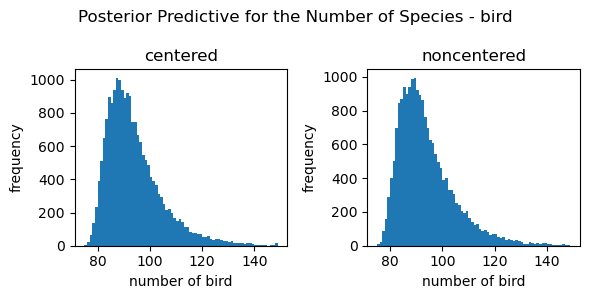

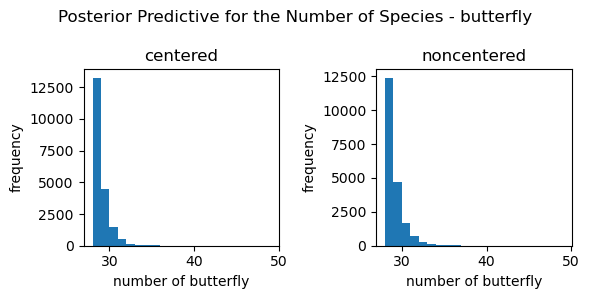

In [10]:
def sigmoid(x: np.ndarray):
    return 1 / (1 + np.exp(-x))

df_bird = [df_bird_centered, df_bird_noncentered]
df_butterfly = [df_butterfly_centered, df_butterfly_noncentered]
xticks = {"bird": np.arange(n_bird, S_bird), "butterfly": np.arange(n_butterfly, S_butterfly)}

for dfs, species in zip([dfs_bird, dfs_butterfly], species):
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))
    for i, (df, label) in enumerate(zip(dfs, labels)):
        E_N_2 = select_columns(df, "E_N_2").to_numpy()
        axes[i].hist(E_N_2, xticks[species])
        axes[i].set_xlabel(f"number of {species}")
        axes[i].set_ylabel("frequency")
        axes[i].set_title(label)
    fig.suptitle(f"Posterior Predictive for the Number of Species - {species}")
    plt.tight_layout()
    plt.show()

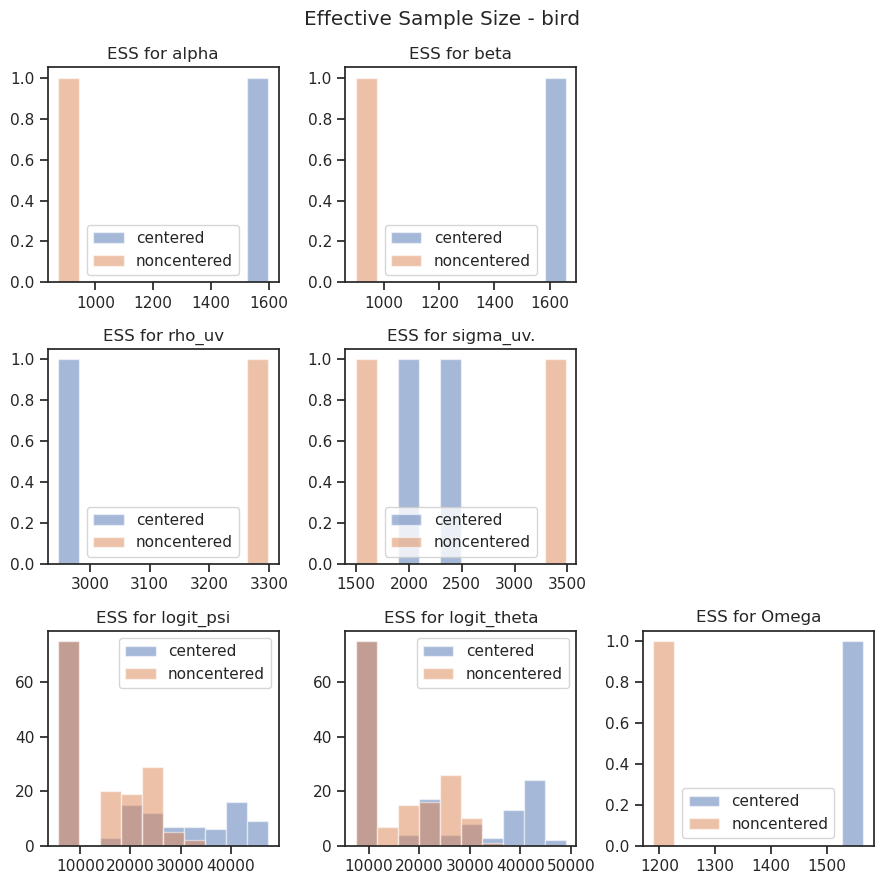

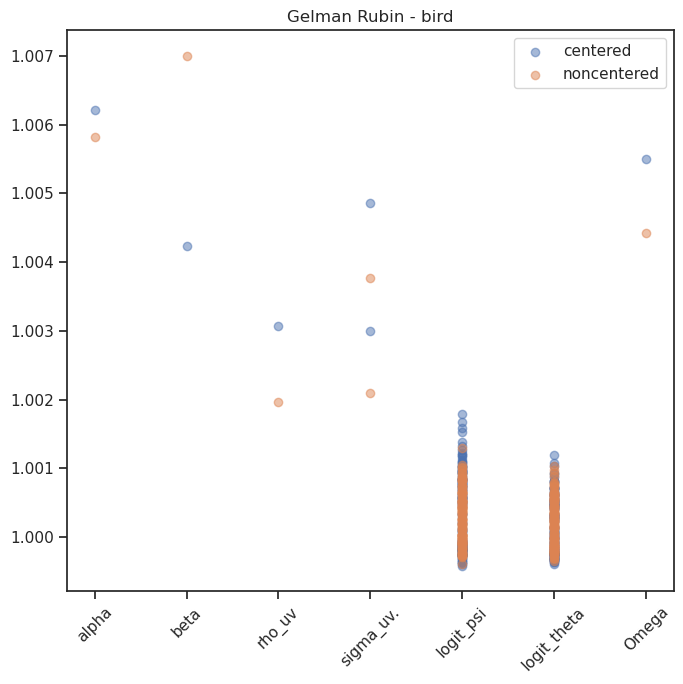

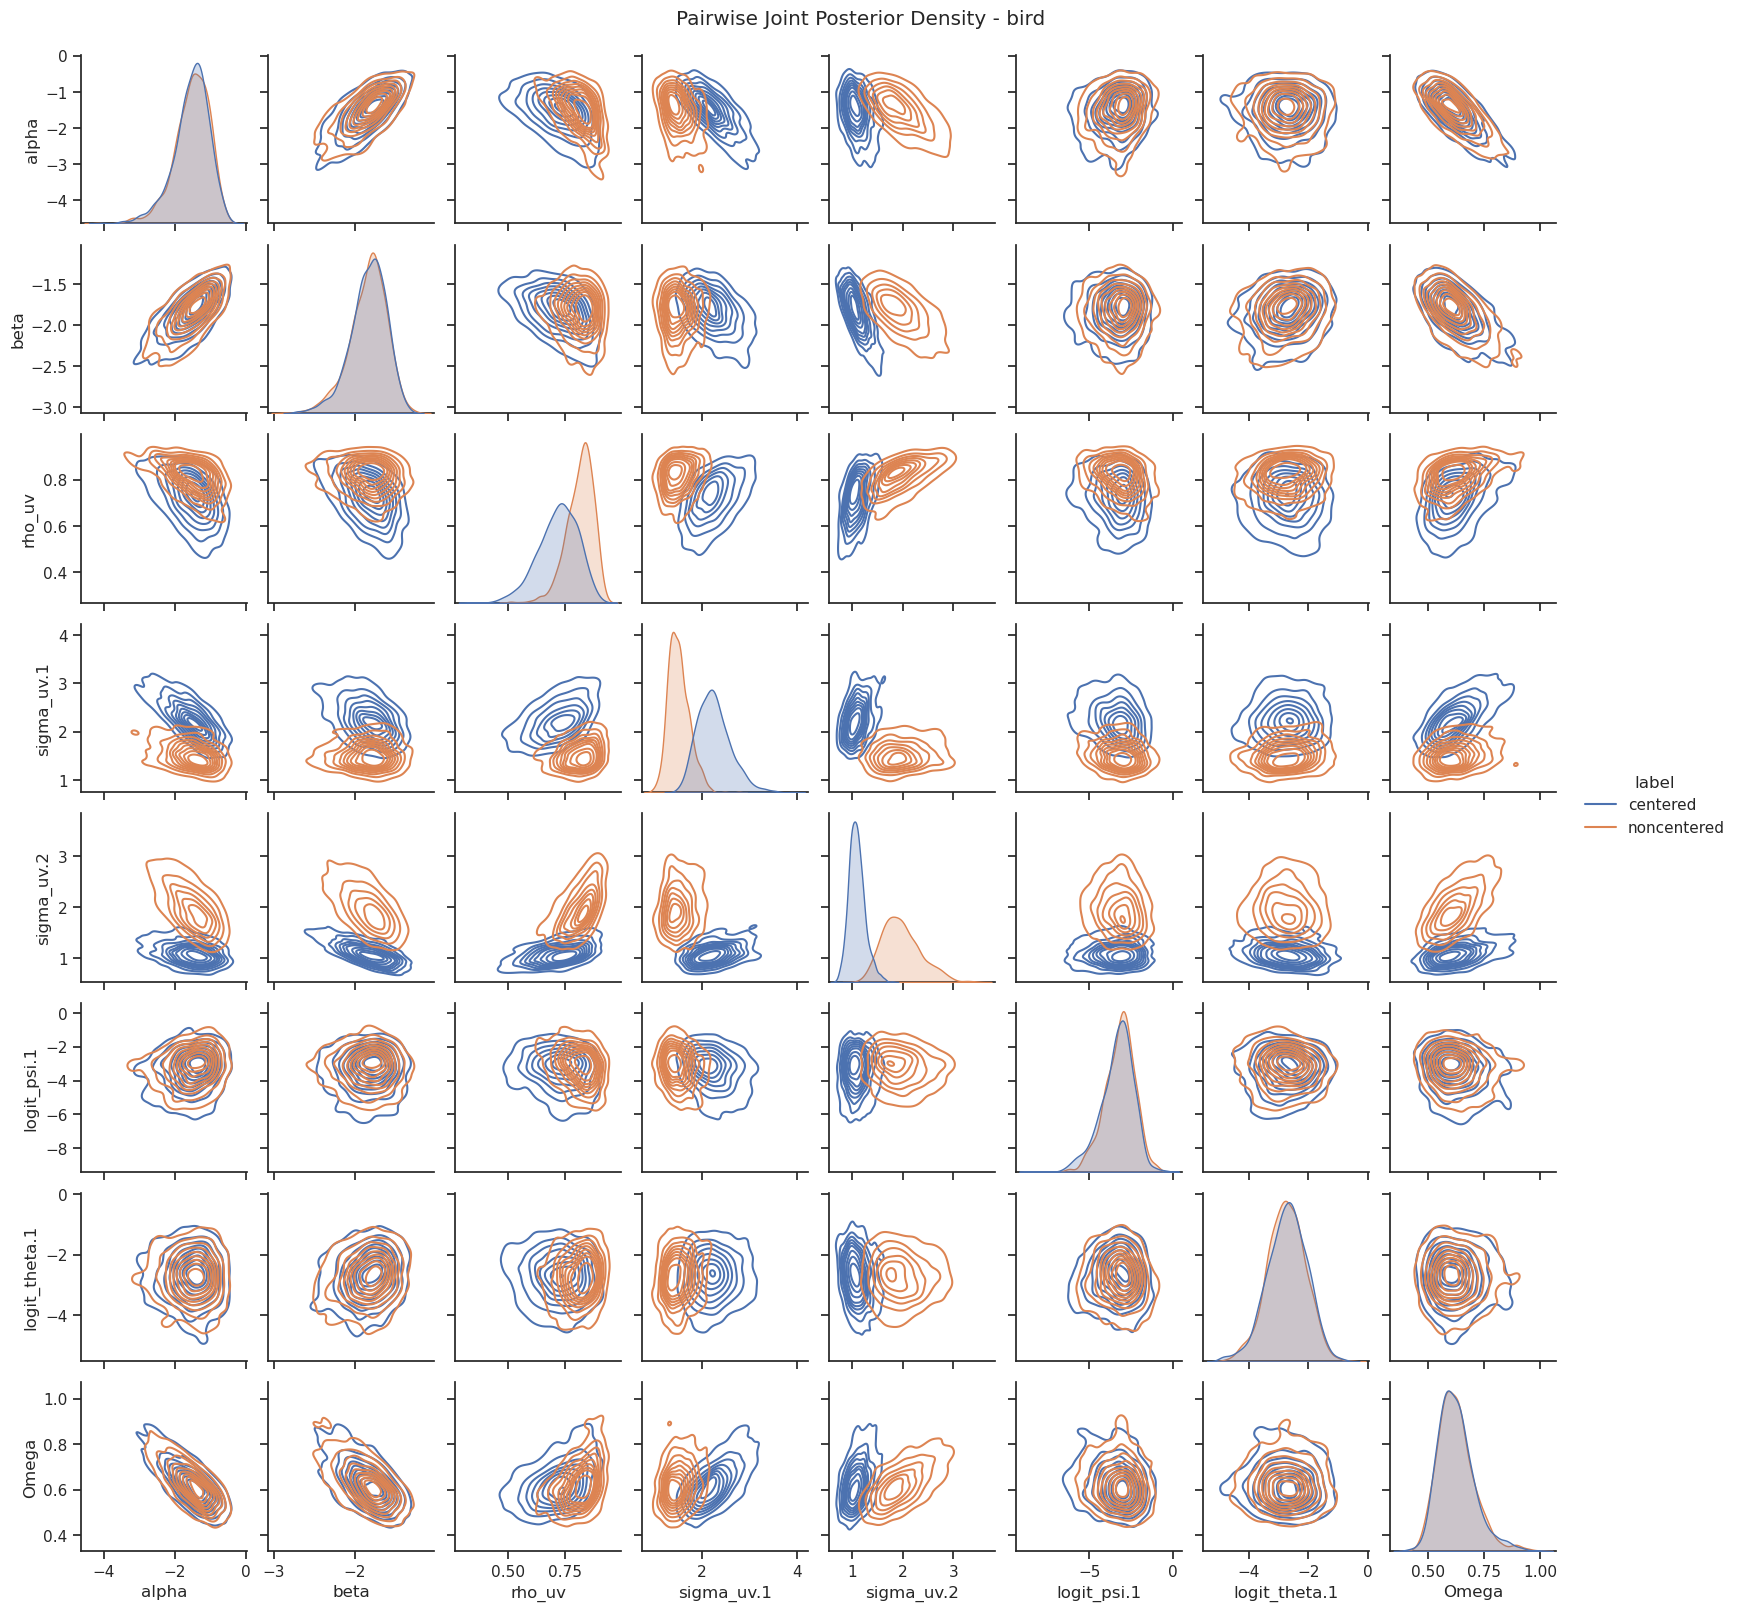

In [12]:
plot_ESS(dfs_bird, labels,
         params=[["alpha", "beta"], ["rho_uv", "sigma_uv."], ["logit_psi", "logit_theta", "Omega"]],
         num_chains=num_chains, num_samples=num_samples,
         title="Effective Sample Size - bird",)

plot_GR(dfs_bird, labels,
        params=["alpha", "beta", "rho_uv", "sigma_uv.", "logit_psi", "logit_theta", "Omega"],
        num_chains=num_chains, num_samples=num_samples,
        title="Gelman Rubin - bird")

plot_posterior(dfs_bird, labels,
               params=["alpha", "beta", "rho_uv", "sigma_uv.1", "sigma_uv.2", "logit_psi.1", "logit_theta.1", "Omega"],
               num_subsamples=1000,
               title="Pairwise Joint Posterior Density - bird")

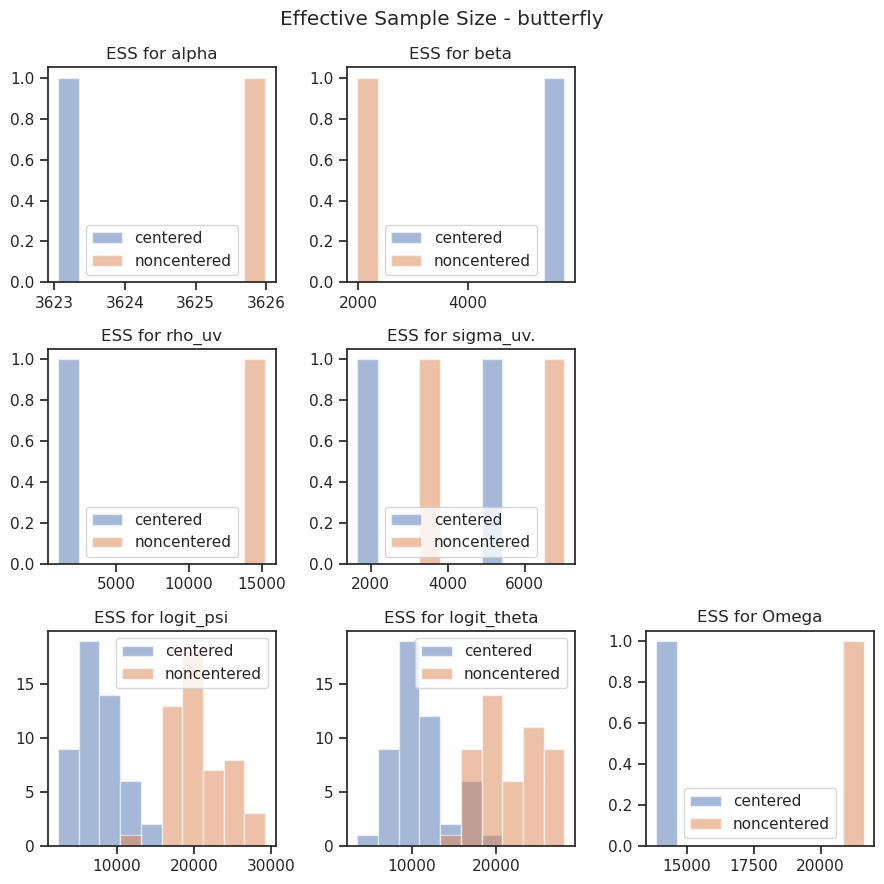

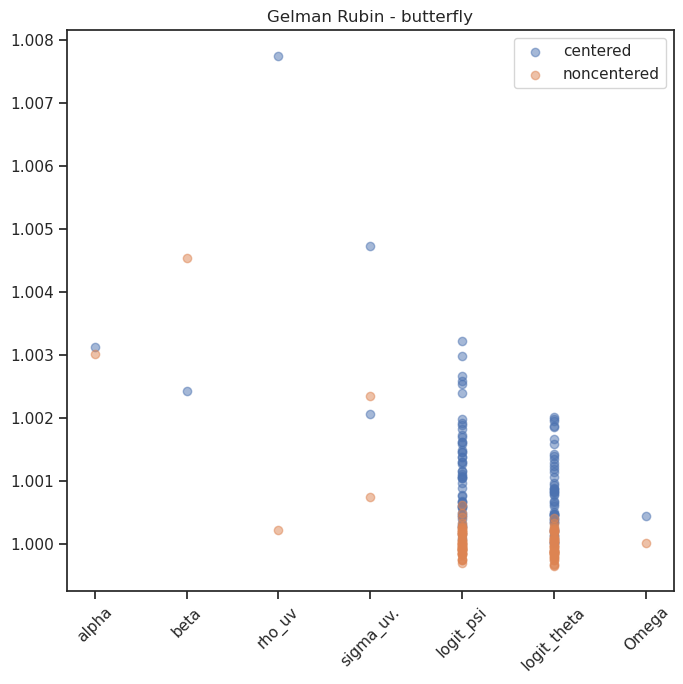

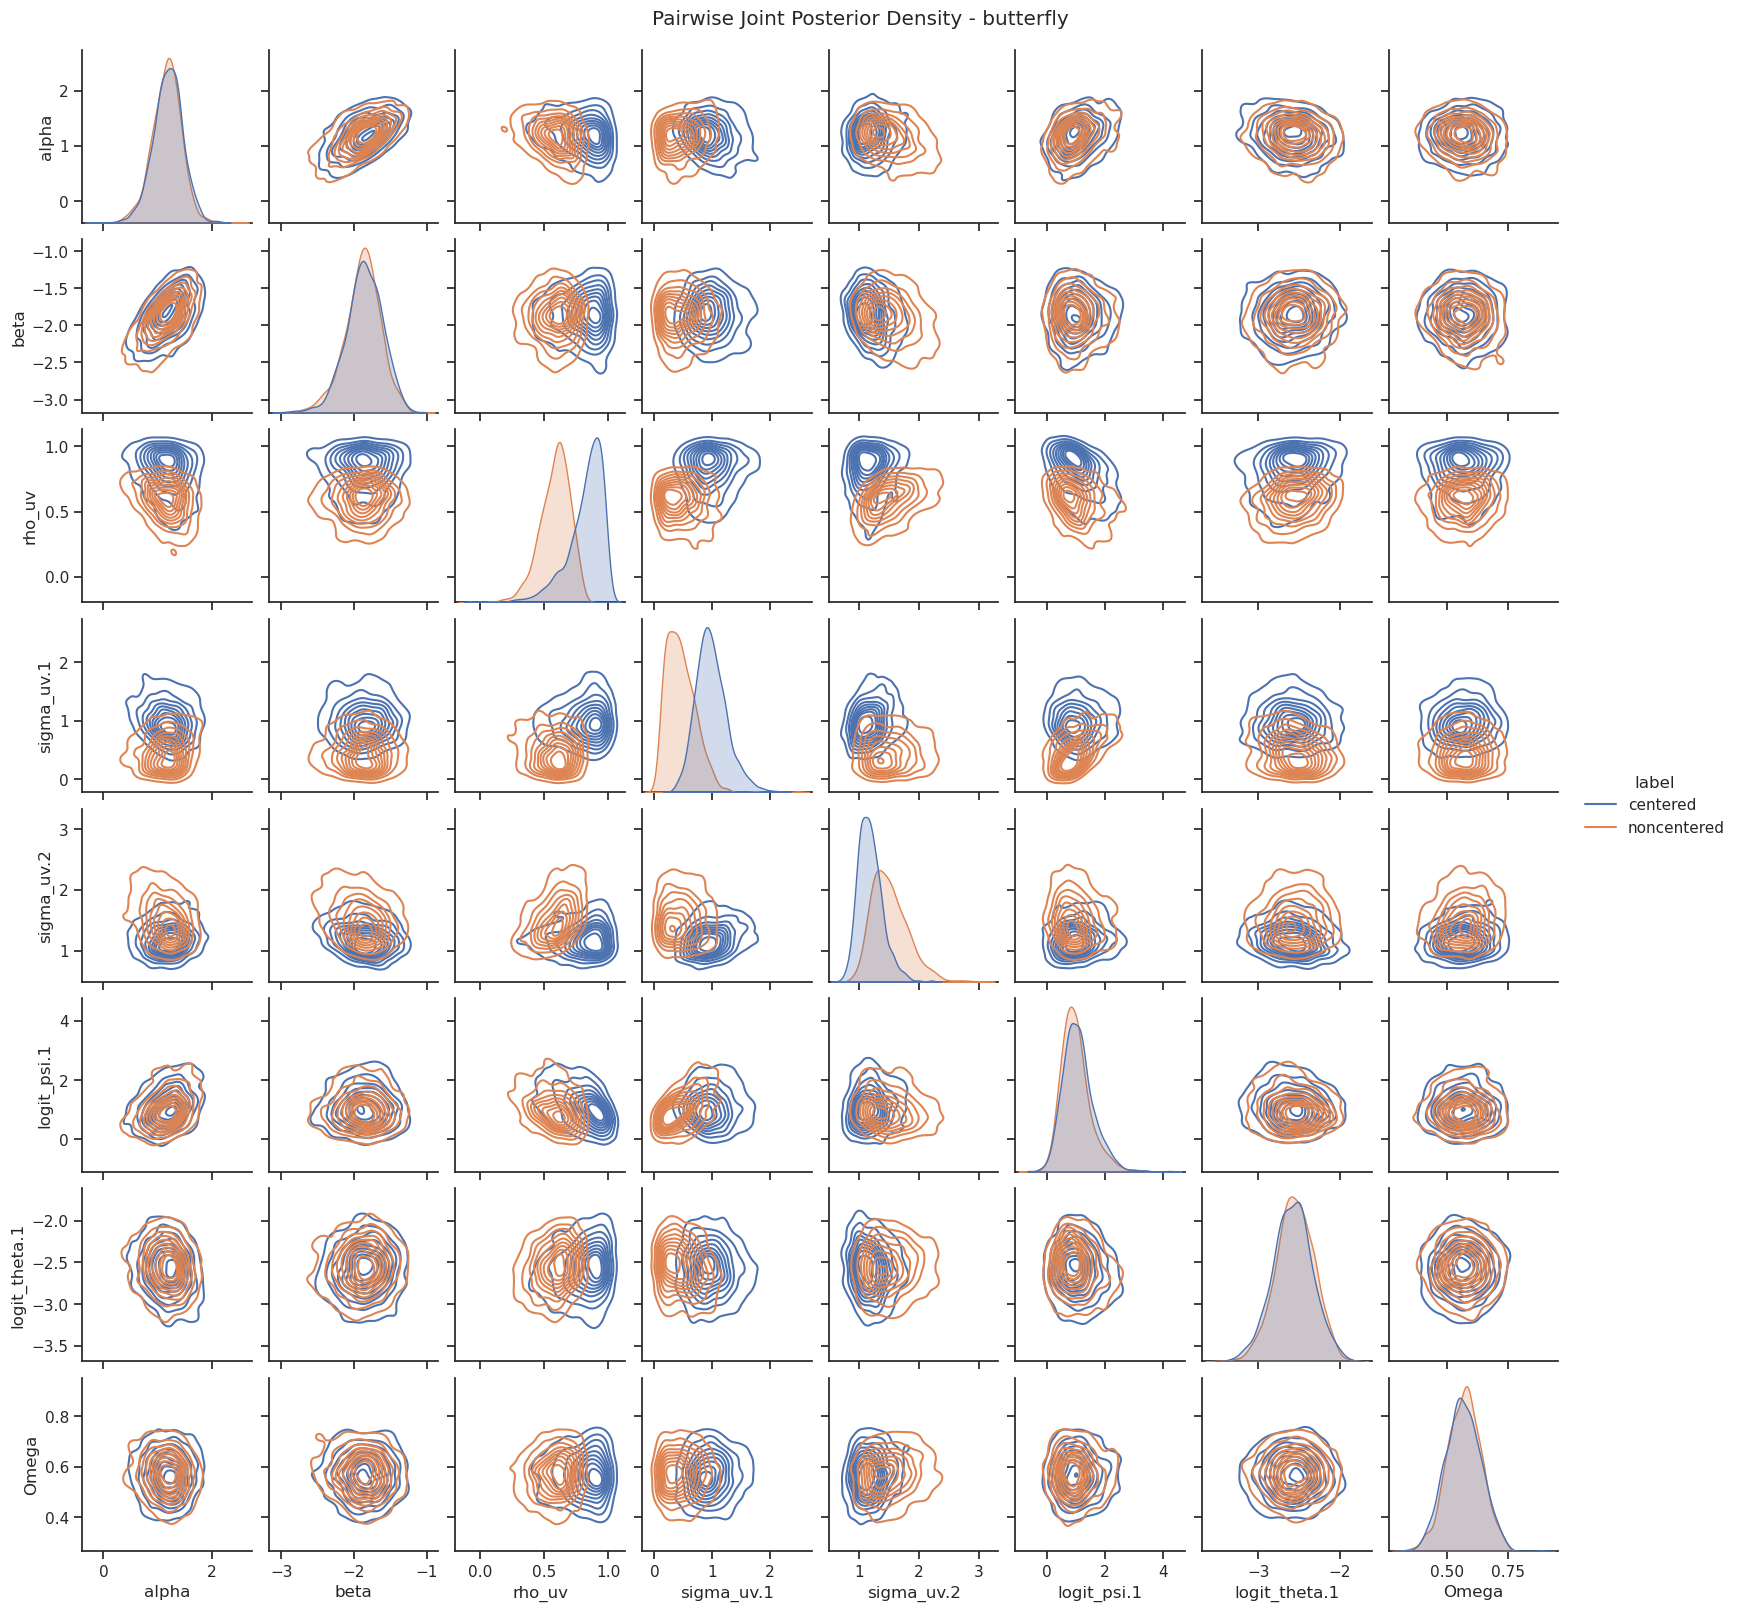

In [13]:
plot_ESS(dfs_butterfly, labels,
         params=[["alpha", "beta"], ["rho_uv", "sigma_uv."], ["logit_psi", "logit_theta", "Omega"]],
         num_chains=num_chains, num_samples=num_samples,
         title="Effective Sample Size - butterfly",)

plot_GR(dfs_butterfly, labels,
        params=["alpha", "beta", "rho_uv", "sigma_uv.", "logit_psi", "logit_theta", "Omega"],
        num_chains=num_chains, num_samples=num_samples,
        title="Gelman Rubin - butterfly")

plot_posterior(dfs_butterfly, labels,
               params=["alpha", "beta", "rho_uv", "sigma_uv.1", "sigma_uv.2", "logit_psi.1", "logit_theta.1", "Omega"],
               num_subsamples=1000,
               title="Pairwise Joint Posterior Density - butterfly")